In [1]:
# Testing LR

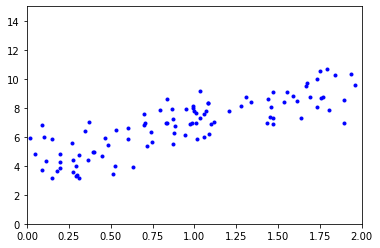

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.axis([0, 2, 0, 15])
plt.plot(X, y, 'b.')

In [3]:
#finding best angle for linReg
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.1680214 ],
       [2.82331049]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.1680214 ],
       [9.81464238]])

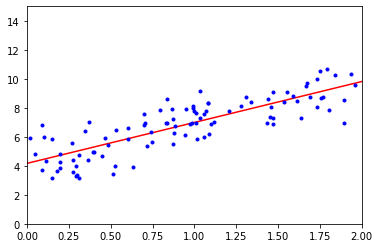

In [5]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
#using sklearn: SVD method
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.1680214]), array([[2.82331049]]))

In [7]:
lin_reg.predict(X_new)

array([[4.1680214 ],
       [9.81464238]])

In [8]:
#scipy least squares used by sklearn
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.1680214 ],
       [2.82331049]])

In [9]:
#same result with direct pseudoinverse calc
np.linalg.pinv(X_b).dot(y)

array([[4.1680214 ],
       [2.82331049]])

In [10]:
#GRADIENT DESCENT

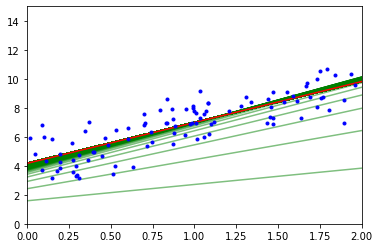

array([[4.1680214 ],
       [2.82331049]])

In [11]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    y_predict = X_new_b.dot(theta)
    plt.plot(X_new, y_predict, "g-", alpha=0.5)
    
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()
theta

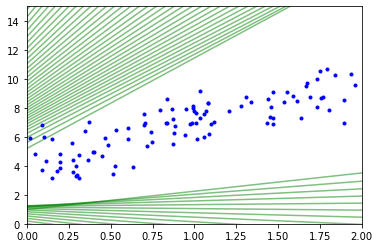

array([[-5.91037060e+10],
       [-6.49079341e+10]])

In [12]:
#Slower learning rate -> gradient won't find the best theta
eta = 0.5
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    y_predict = X_new_b.dot(theta)
    plt.plot(X_new, y_predict, "g-", alpha=0.5)
    
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()
theta

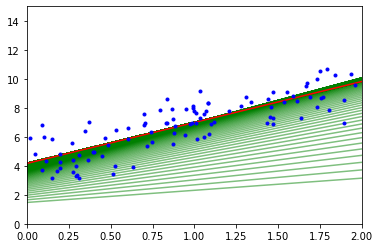

array([[4.16686405],
       [2.82436434]])

In [13]:
#Slower learning rate -> more time
eta = 0.02 
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    y_predict = X_new_b.dot(theta)
    plt.plot(X_new, y_predict, "g-", alpha=0.5)
    
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()
theta

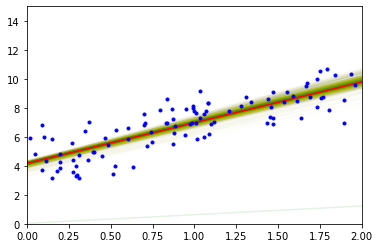

array([[4.17538144],
       [2.80383992]])

In [14]:
#Stochastic gradient
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    y_predict = X_new_b.dot(theta)
    plt.plot(X_new, y_predict, "g-", alpha=0.1)
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, "y-", alpha=0.01)
        
        
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()
theta
#not exactly visible

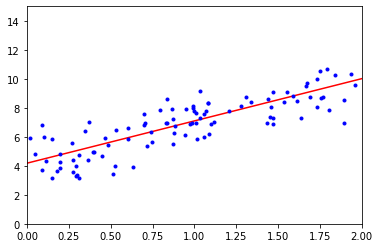

(array([4.18105808]), array([2.91585686]))

In [15]:
#sklearn Stochastic gradient
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

theta=(sgd_reg.intercept_, sgd_reg.coef_)
y_predict = X_new_b.dot(theta)

plt.plot(X_new, y_predict,"r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

theta

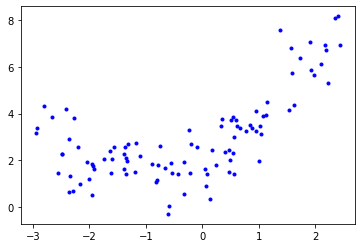

In [16]:
#POLYNOMIAL REGRESSION
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X,y,"b.")

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.58275582])

In [18]:
X_poly[0]

array([-0.58275582,  0.33960434])

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_ , X_poly[99],

(array([2.08626185]),
 array([[1.07723059, 0.51113071]]),
 array([1.0184095 , 1.03715791]))

In [20]:
y_predict = (X_poly*lin_reg.coef_).sum(1)+lin_reg.intercept_
y_predict

array([1.63208167, 2.38529176, 2.51671407, 2.71917191, 3.36947608,
       2.67066119, 7.77450437, 2.81594774, 2.91186511, 1.98639146,
       1.69181752, 1.88580434, 1.55255428, 2.14674828, 3.94736028,
       2.17570677, 1.92597961, 1.79652591, 2.86583897, 3.69388133,
       1.54771771, 2.85129361, 2.39823925, 1.62119496, 3.76513731,
       1.76096507, 1.52614952, 6.92044113, 5.03933347, 1.79336801,
       2.84938383, 1.93240136, 3.58720252, 4.56339939, 2.30399277,
       2.15886795, 1.56379188, 3.21980358, 1.52753988, 7.4257205 ,
       1.56421701, 1.88035063, 1.90755327, 2.13423559, 1.56103773,
       7.04853203, 7.6687632 , 1.65324358, 1.6519527 , 2.50196241,
       3.58996936, 1.57870545, 6.24526231, 2.93077257, 6.05791527,
       1.59601901, 1.85939179, 5.98996867, 5.17604412, 2.19298066,
       3.81956242, 2.02436658, 1.57439906, 2.70384739, 1.67655487,
       2.27957154, 1.72029427, 1.67335048, 3.35933202, 1.55078088,
       5.11567221, 3.09073867, 4.00418683, 2.81147165, 2.56020

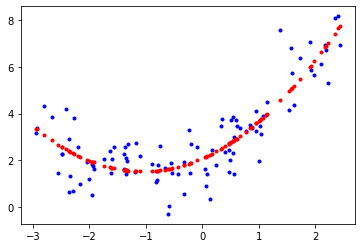

In [21]:
plt.plot(X,y,"b.")
plt.plot(X,y_predict,"r.")
#Took me two hours to figure out how to visualize this and I'm not really proud about taking it so long

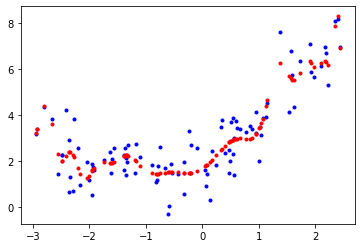

In [22]:
#Notice how increasing the degrees generates overfitting

from scipy.interpolate import make_interp_spline

poly_features=PolynomialFeatures(degree=30, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
y_predict = (X_poly*lin_reg.coef_).sum(1)+lin_reg.intercept_

plt.plot(X,y,"b.")
plt.plot(X,y_predict,"r.")

In [34]:
#LEARNING CURVES in relation to training set size
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(["Training error","Validation error"])

(array([1.68836497]),
 array([[ 1.59324707e+00,  3.27583888e+00, -7.23030874e-01,
         -5.26860255e+00, -1.02645769e+00, -3.04838564e-01,
          1.35675700e-02,  3.82698649e+00,  1.24585981e+00,
          1.93136635e+00,  9.28546752e-01, -2.80190287e+00,
         -1.01096646e+00, -1.86888070e+00, -1.30524499e+00,
          3.42785405e+00,  2.04917572e+00, -1.89059902e+00,
         -1.18457939e+00,  5.40950399e-01,  3.80865976e-01,
         -8.42689987e-02, -7.42962654e-02,  5.70827180e-03,
          8.77527812e-03,  1.82114089e-04, -5.79282182e-04,
         -5.25087542e-05,  1.64446621e-05,  2.34695362e-06]]),
 array([1.0184095 , 1.03715791, 1.05625147, 1.07569654, 1.09549958,
        1.11566718, 1.13620605, 1.15712304, 1.1784251 , 1.20011932,
        1.22221292, 1.24471325, 1.2676278 , 1.2909642 , 1.31473021,
        1.33893373, 1.36358284, 1.38868572, 1.41425073, 1.44028638,
        1.46680134, 1.49380442, 1.52130462, 1.54931108, 1.57783312,
        1.60688024, 1.63646211, 1.6

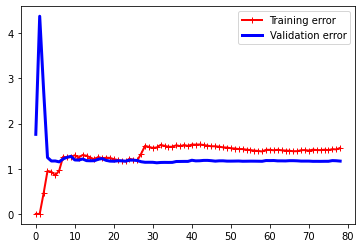

In [35]:
#LINEAR REGRESSION

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_ , X_poly[99]

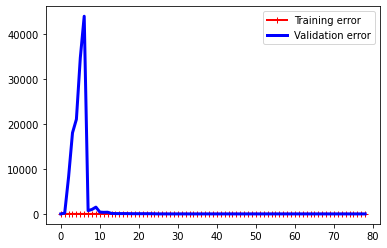

In [37]:
#POLYNOMIAL REGRESSION

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)

In [56]:
#REGULARIZED REGRESSION METHODS
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

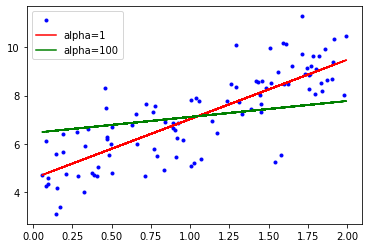

In [71]:
#RIDGE REGRESSION w/ FACTORIZATION
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
y_predict = ridge_reg.predict(X)
plt.plot(X,y,"b.")
plt.plot(X,y_predict,"r-")
ridge_reg = Ridge(alpha=100, solver="cholesky")
ridge_reg.fit(X, y)
y_predict = ridge_reg.predict(X)
plt.plot(X,y_predict,"g-")
plt.legend([None,"alpha=1","alpha=100"])

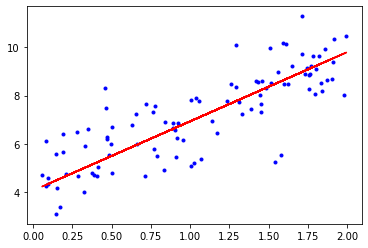

In [58]:
#RIDGE REGRESSION w/ SGD
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
y_predict = sgd_reg.predict(X)
plt.plot(X,y,"b.")
plt.plot(X,y_predict,"r-")